# **GRIP @ The Sparks Foundation**
# **Author: Sanjoy Paul**
## **Domain: Data Science & Business Analytics**
## **Task-3: Exploratory Data Analysis-Retail**
### **Dataset: https://bit.ly/3i4rbWl**

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### **Reading the Dataset**

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
df.shape

(9994, 13)

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


### **Correlation Matrix**

In [9]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

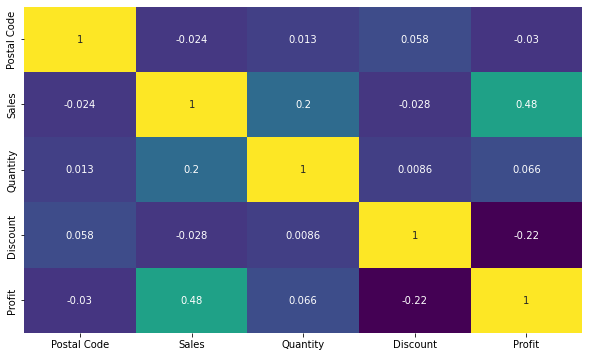

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis',cbar=False)

In [11]:
def corMat(df):
  plt.figure(figsize=(10,6))
  corr_mat=df.corr()
  mask=np.zeros_like(corr_mat,dtype=np.bool)
  mask[np.triu_indices_from(mask)]=True
  sns.heatmap(corr_mat,mask=mask,annot=True,cbar=False)
  plt.show()

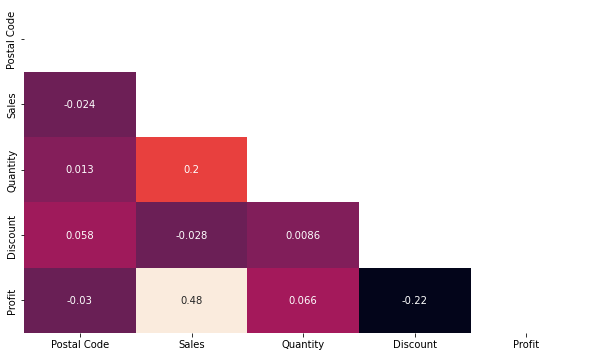

In [12]:
corMat(df)

### **Pair Plot**

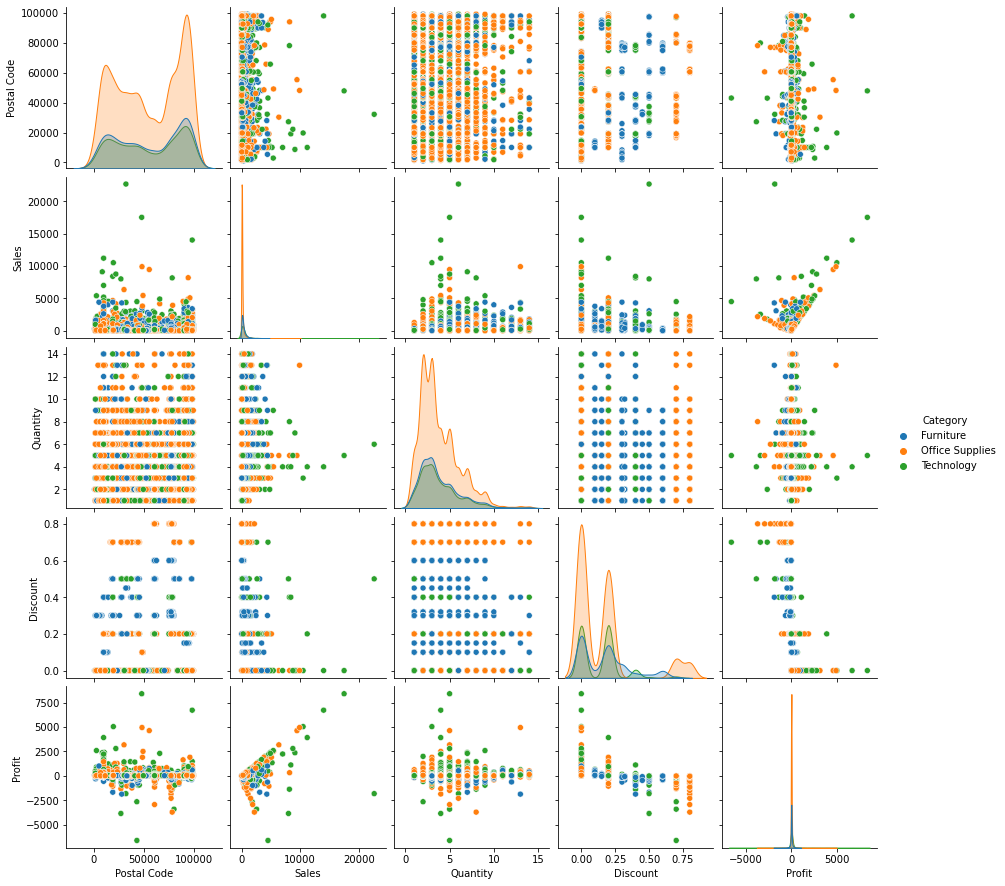

In [13]:
sns.pairplot(df,hue='Category')

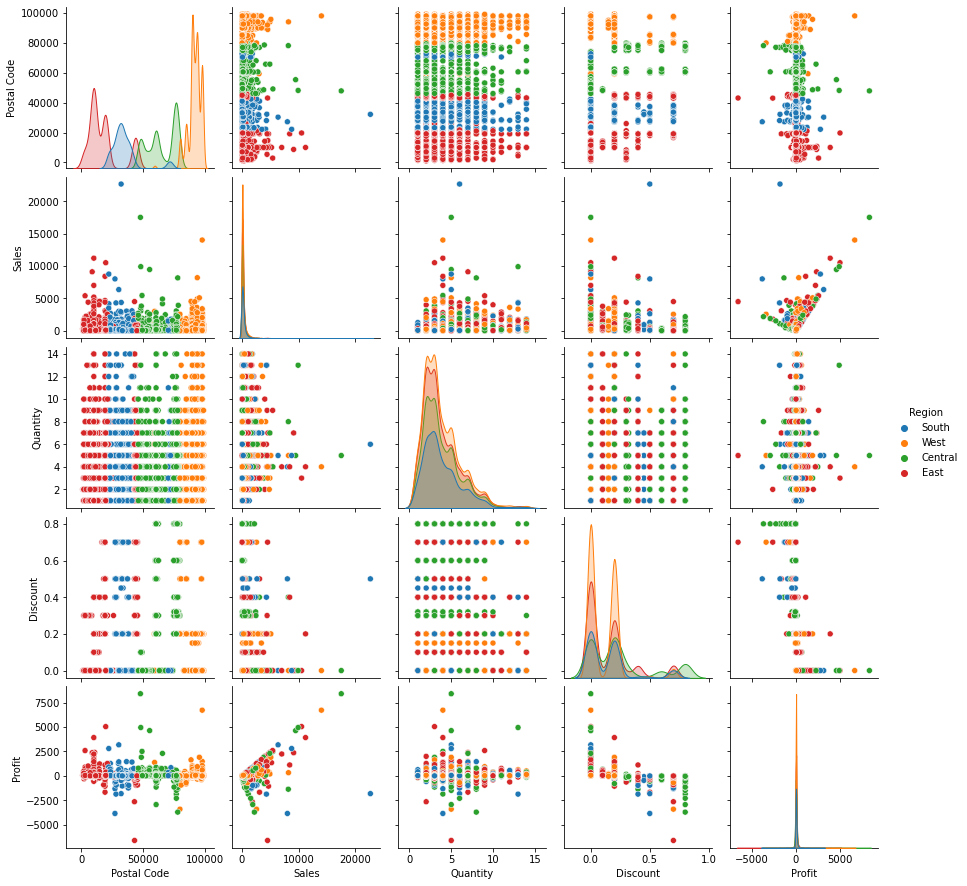

In [14]:
sns.pairplot(df,hue='Region')

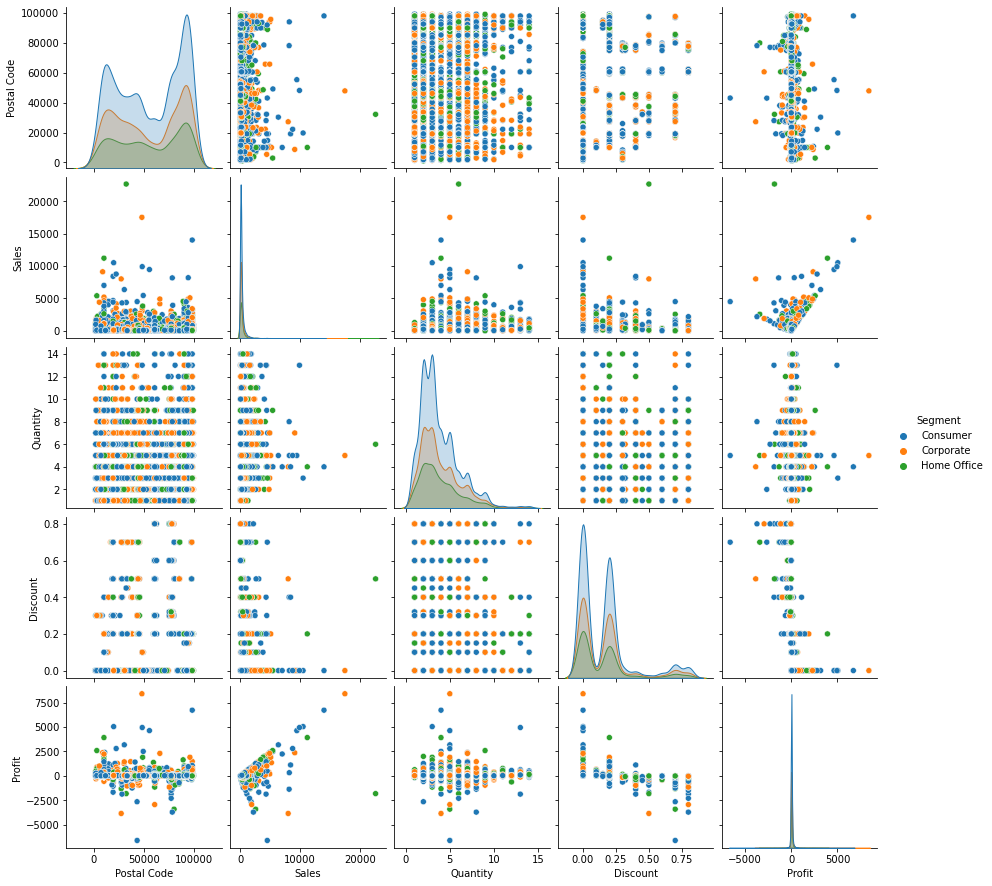

In [15]:
sns.pairplot(df,hue='Segment')

### **Count Plot**

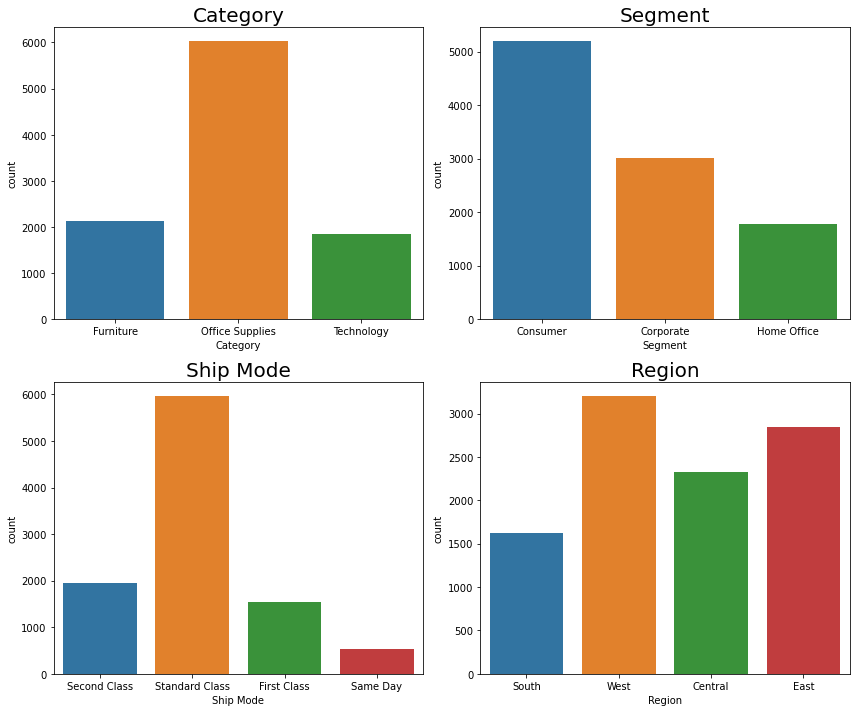

In [16]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(12,10));
sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)
plt.tight_layout()

Text(0.5, 1.0, 'Sub-Category')

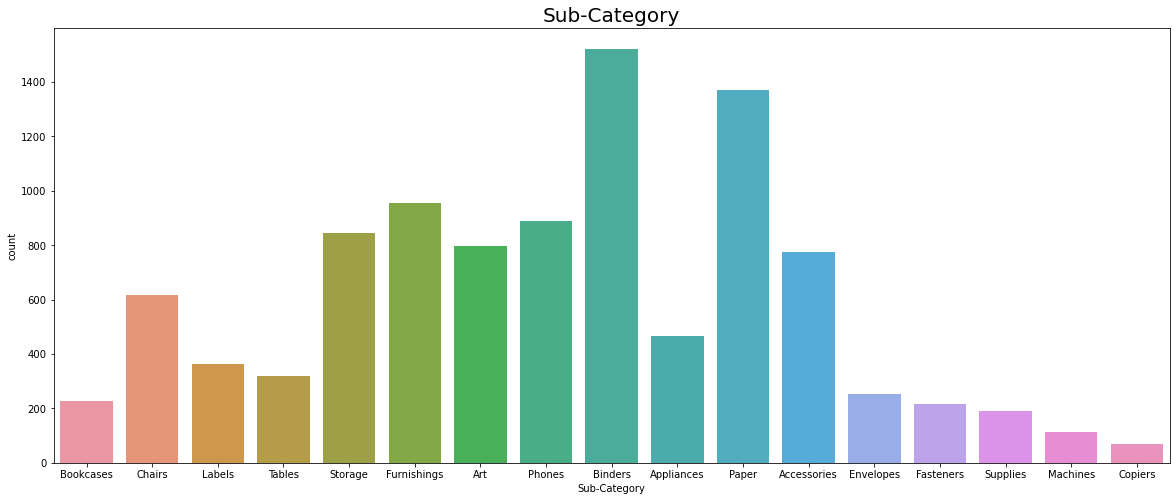

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

**Top 3 Sub-Category**
* **Bibders**
* **Paper**
* **Furnishings**

**Lowest Sub_category**
* **Copiers**

Text(0.5, 1.0, 'State')

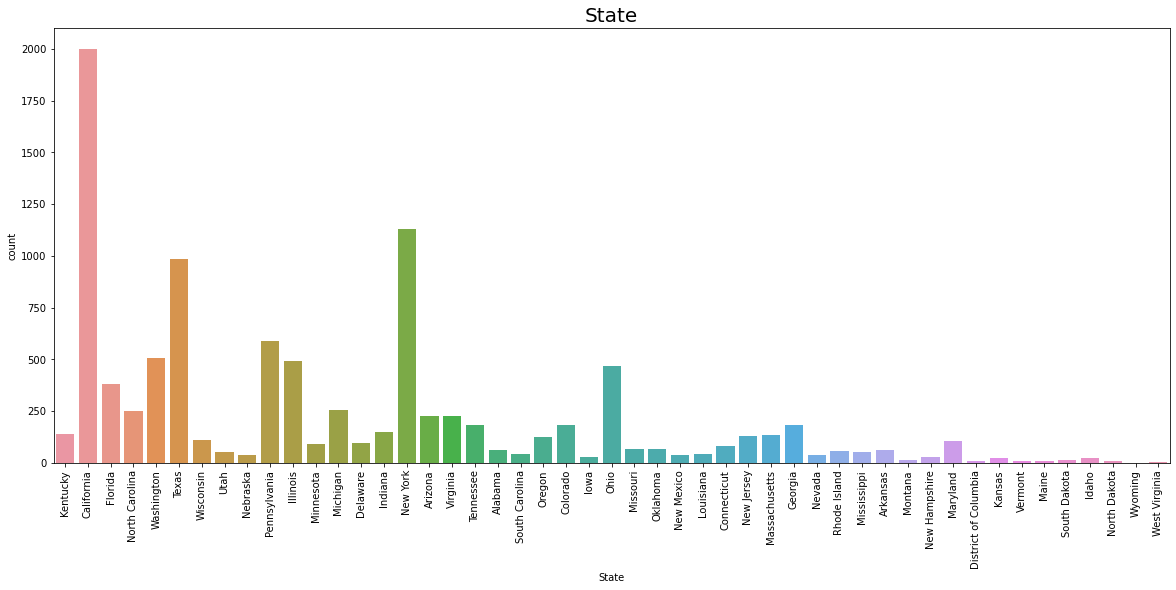

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=20)

**Top 3 Number of State**
* **California**
* **New Work**
* **Texas**

**Lowest Number of State**
* **Wyoming**

Text(0.5, 1.0, 'Sales')

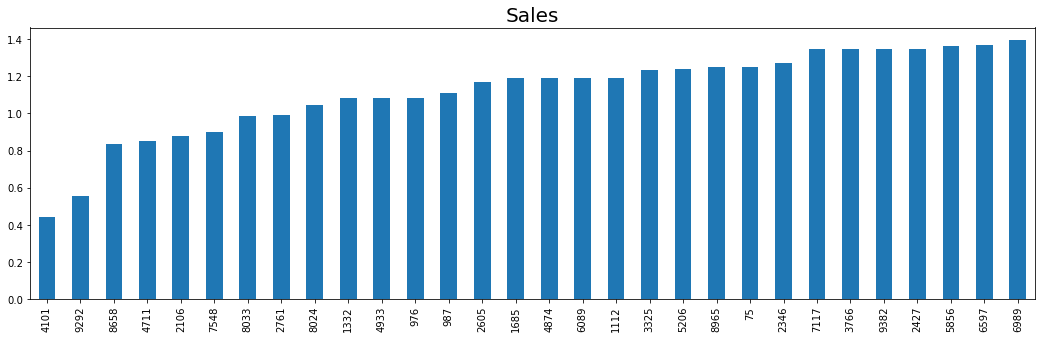

In [19]:
df['Sales'].sort_values().head(30).plot(kind='bar', figsize=(18,5))
plt.xticks(rotation=90)
plt.title('Sales',fontsize=20)

Text(0.5, 1.0, 'Quantity')

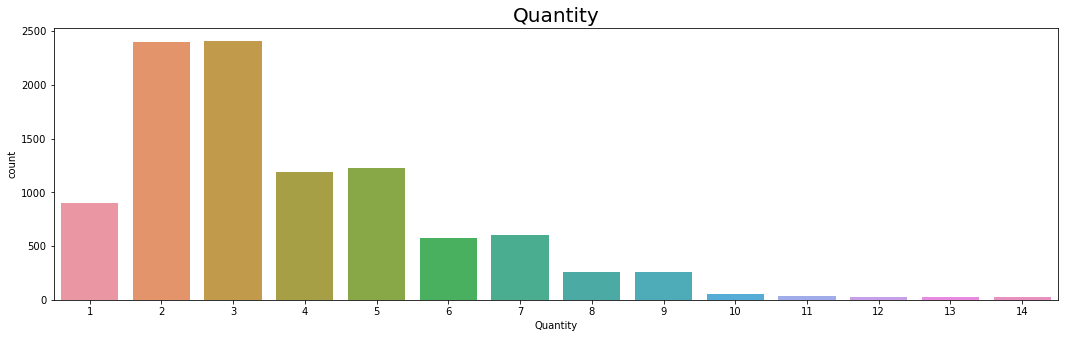

In [20]:
plt.figure(figsize=(18,5))
sns.countplot(df['Quantity'])
plt.title('Quantity',fontsize=20)

Text(0.5, 1.0, 'Discount')

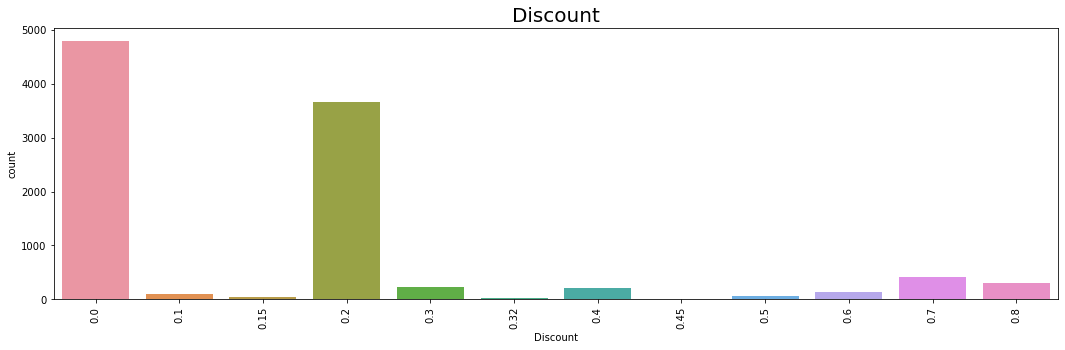

In [21]:
plt.figure(figsize=(18,5))
sns.countplot(df['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

### **Distribution Plot**

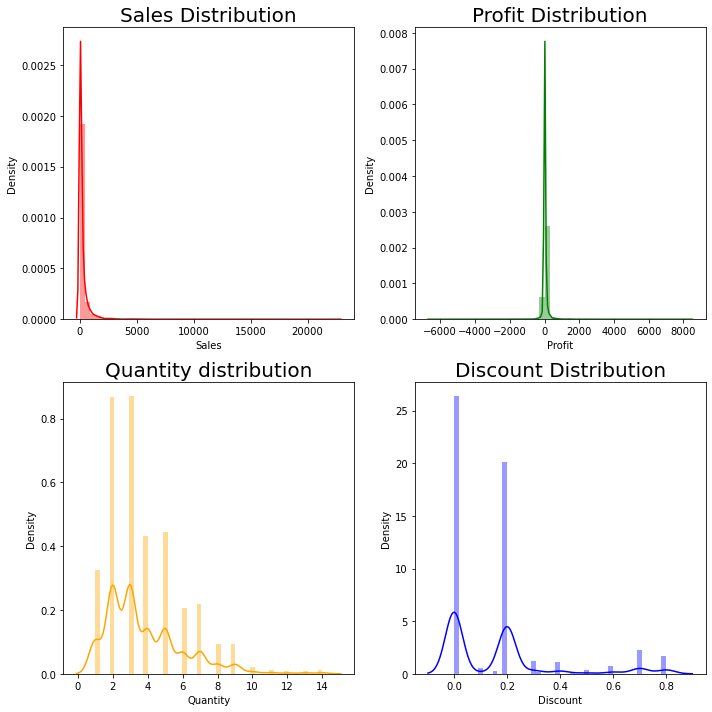

In [22]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(df['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.tight_layout()
plt.show()

### **State Wise Dealing Analysis**

In [23]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [24]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

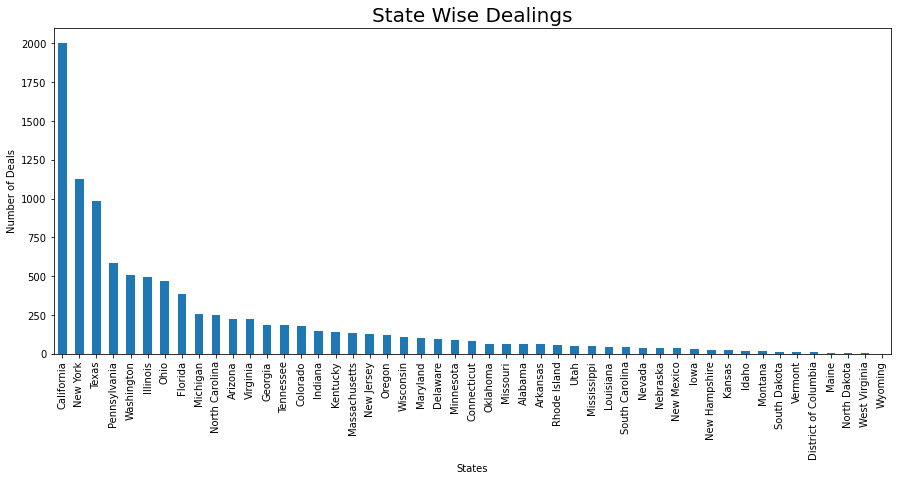

In [25]:
df['State'].value_counts().plot(kind='bar',figsize=(15,6))
plt.ylabel('Number of Deals')
plt.xlabel('States')
plt.title('State Wise Dealings', fontsize = 20)
plt.show()

**Highest Number of Deal**


*   **California**


**Lowest Number of Deal**


*   **Wyoming**



In [26]:
df['State'].value_counts().mean()

203.9591836734694

**Average Number of Per Deal: 204**

In [71]:
df_state= df.groupby(['State'])[['Sales', 'Profit','Discount','Quantity']].mean()
df_state.head(10)

,Sales,Profit,Discount,Quantity
State,,,,
Alabama,319.846557,94.865989,0.000000,4.196721
Arizona,157.508933,-15.303235,0.303571,3.848214
Arkansas,194.635500,66.811452,0.000000,4.000000
California,228.729451,38.171608,0.072764,3.831584
Colorado,176.418231,-35.867351,0.316484,3.807692
Connecticut,163.223866,42.823071,0.007317,3.426829
Delaware,285.948635,103.930988,0.006250,3.822917
District of Columbia,286.502000,105.958930,0.000000,4.000000
Florida,233.612815,-8.875461,0.299347,3.600522


### **State Wise Profit Analysis**

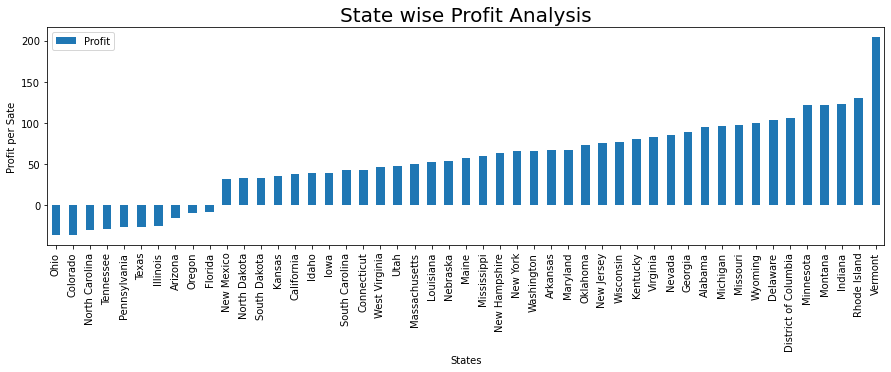

In [72]:
df_state=df_state.sort_values('Profit')
df_state[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

**Highest Profit**
* **Vermont**

**Lowest Profit**

*   **Ohio**



### **State Wise Sales Analysis**

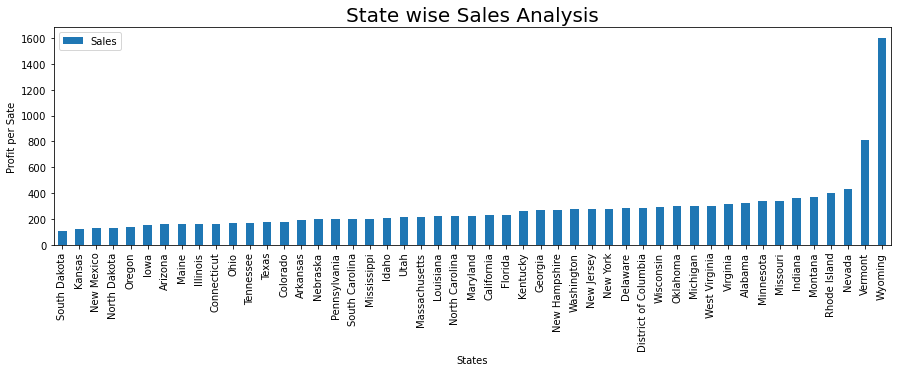

In [73]:
df_state=df_state.sort_values('Sales')
df_state[['Sales']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Sales Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

Text(0.5, 1.0, 'State wise analysis of Sale')

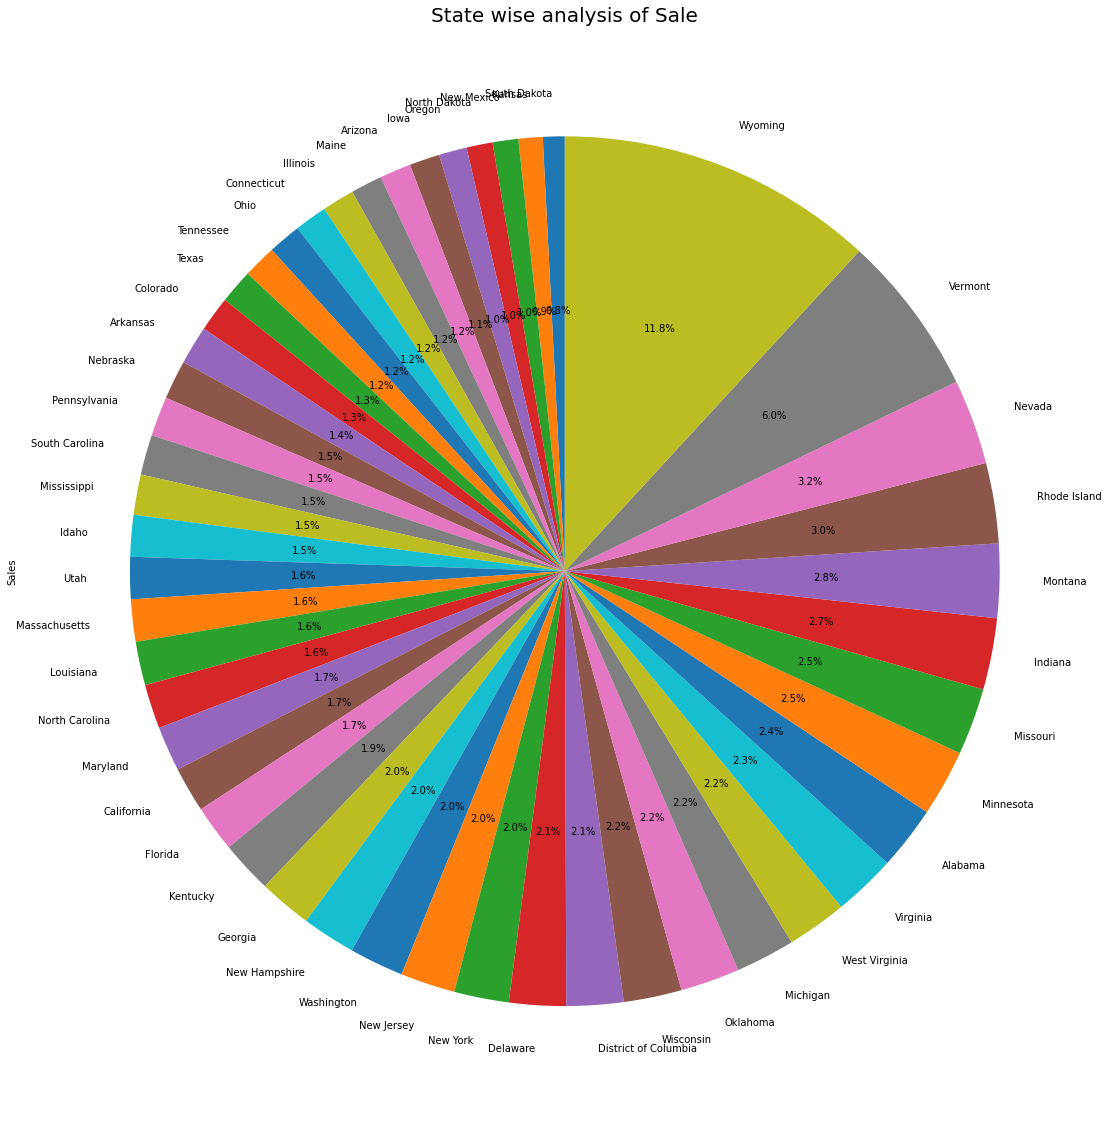

In [74]:
df_state['Sales'].plot(kind='pie', figsize = (20,20), autopct='%1.1f%%', startangle=90)
plt.title('State wise analysis of Sale',fontsize=20)

**Highest Sales**

*   **Wyoming**

**Lowest Sales**

*  **South Dakota**



### **State Wise Discount Analysis**

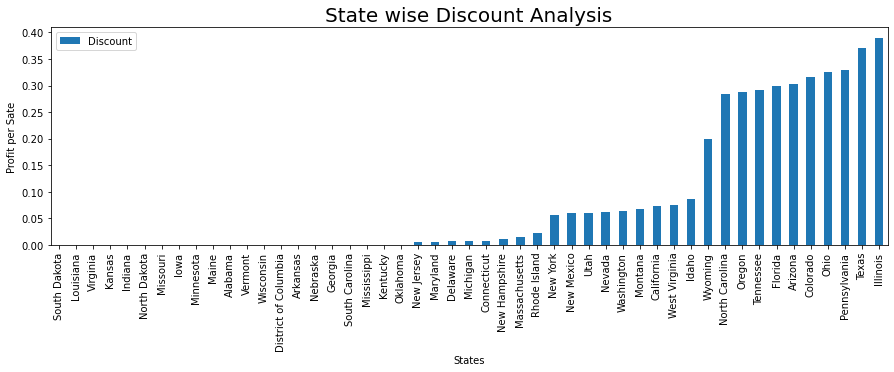

In [76]:
df_state=df_state.sort_values('Discount')
df_state[['Discount']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Discount Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

**Highest Discount**

*   **IIinois**

**Lowest Discount**

*   **South Dakota**


### **State Wise Quantity Analysis**

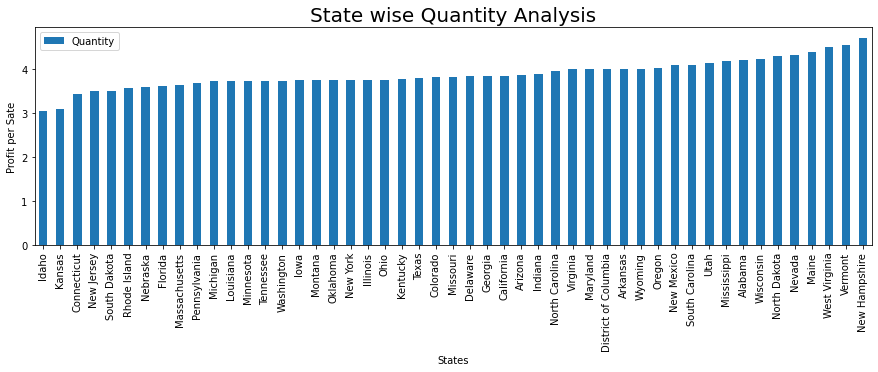

In [32]:
df_state=df_state.sort_values('Quantity')
df_state[['Quantity']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Quantity Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

**Highest Quantity**

* **New Hampshire**

**Lowest Quantity**

* **Idaho**




### **City Wise Dealing Analysis**

In [77]:
df['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

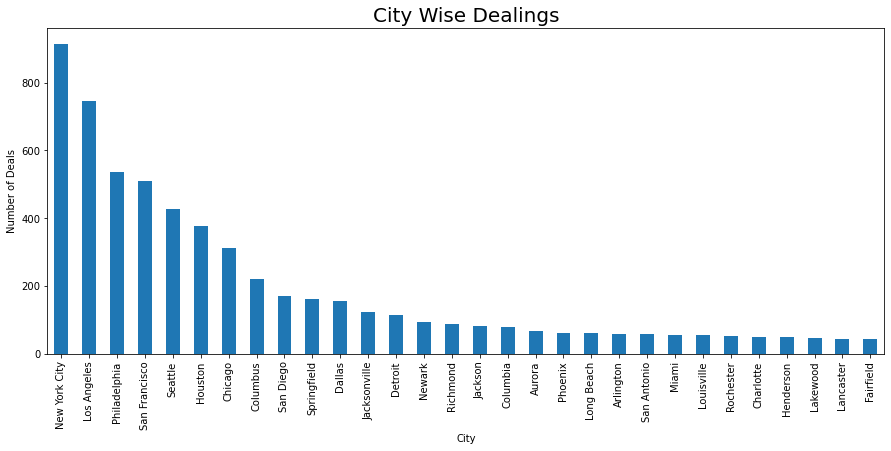

In [78]:
df['City'].value_counts().head(30).plot(kind='bar',figsize=(15,6))
plt.title('City Wise Dealings',fontsize=20)
plt.xlabel('City')
plt.ylabel('Number of Deals')
plt.show()

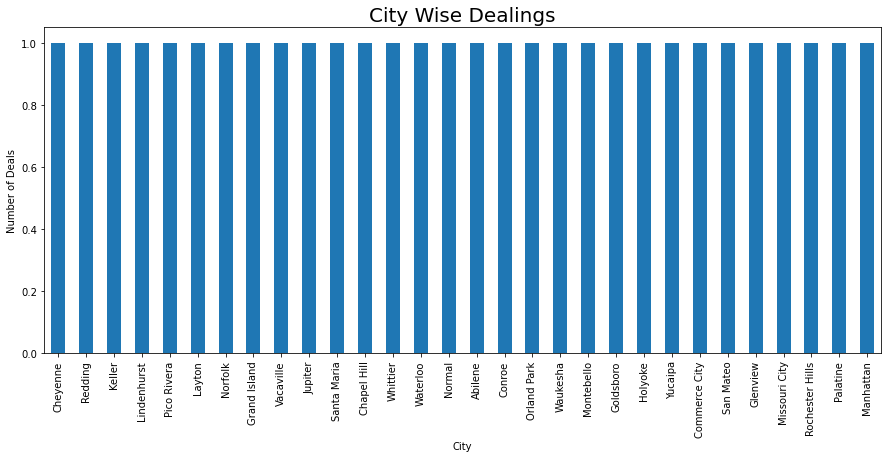

In [79]:
df['City'].value_counts().tail(30).plot(kind='bar',figsize=(15,6))
plt.title('City Wise Dealings',fontsize=20)
plt.xlabel('City')
plt.ylabel('Number of Deals')
plt.show()

**Highest Number of Deal**

* **New York City**

**Lowest Number of Deal**

* **Manhattan**



In [80]:
df['City'].value_counts().mean()

18.821092278719398

**Average Number of Per Deal: 19**

In [96]:
df_city= df.groupby(['City'])[['Sales', 'Profit','Discount']].mean()
df_city

,Sales,Profit,Discount
City,,,
Aberdeen,25.500000,6.630000,0.000000
Abilene,1.392000,-3.758400,0.800000
Akron,129.999333,-8.887410,0.357143
Albuquerque,158.582857,45.292007,0.057143
Alexandria,344.973125,19.913644,0.000000
...,...,...,...
Woonsocket,48.887500,19.669775,0.000000
Yonkers,510.511067,184.517047,0.066667
York,163.595600,-20.433840,0.420000


Text(0.5, 1.0, 'City wise analysis of Sales')

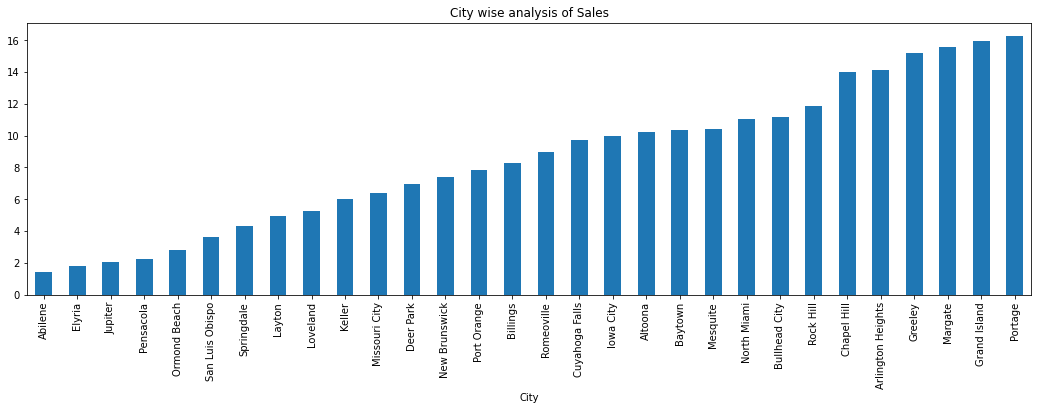

In [97]:
df_city['Sales'].sort_values().head(30).plot(kind='bar',figsize=(18,5))
plt.title('City wise analysis of Sales')

Text(0.5, 1.0, 'City wise analysis of Sales')

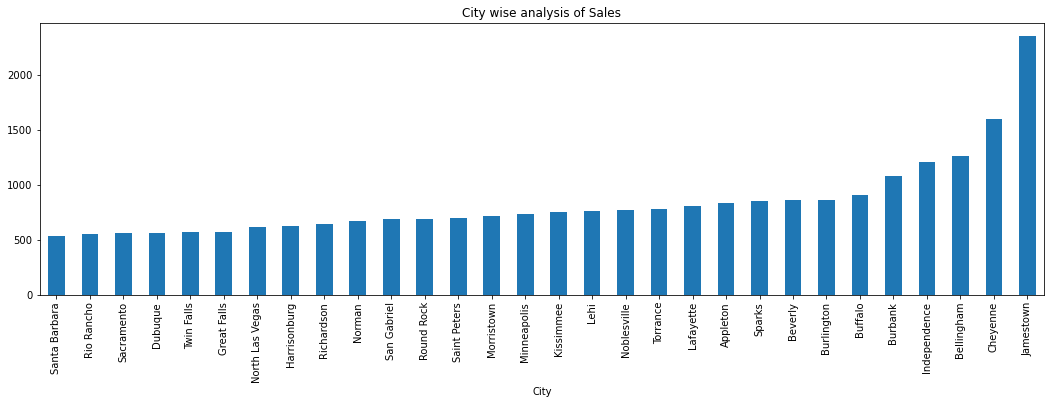

In [98]:
df_city['Sales'].sort_values().tail(30).plot(kind='bar',figsize=(18,5))
plt.title('City wise analysis of Sales')

**Highest Sales Of City**
* **Jamestown**

**Lowest Sales of City**
* **Santa Barbara**

Text(0.5, 1.0, 'City wise Analysis of Profit')

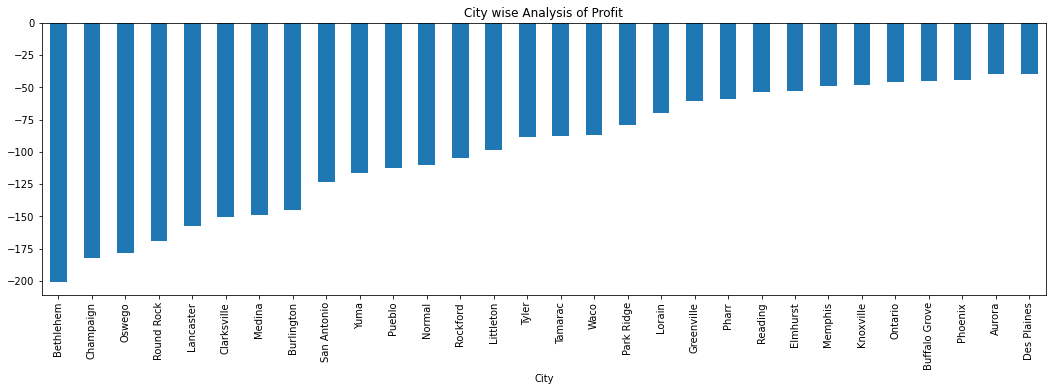

In [91]:
df_city['Profit'].sort_values().head(30).plot(kind='bar',figsize=(18,5))
plt.title('City wise Analysis of Profit')

Text(0.5, 1.0, 'City wise Analysis of Profit')

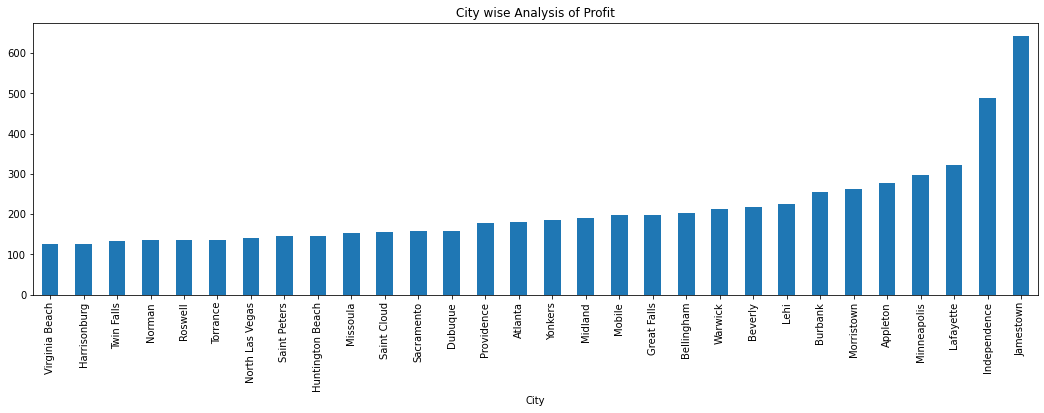

In [92]:
df_city['Profit'].sort_values().tail(30).plot(kind='bar',figsize=(18,5))
plt.title('City wise Analysis of Profit')

**Highest Profit**
* **Jamestown**

**Lowest Profit**
* **Bethlehem**

### Segment Wise Dealing Analysis

In [40]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [41]:
df_segment= df.groupby(['Segment'])[['Sales', 'Profit','Discount']].mean()
df_segment

,Sales,Profit,Discount
Segment,,,
Consumer,223.733644,25.836873,0.158141
Corporate,233.823300,30.456667,0.158228
Home Office,240.972041,33.818664,0.147128


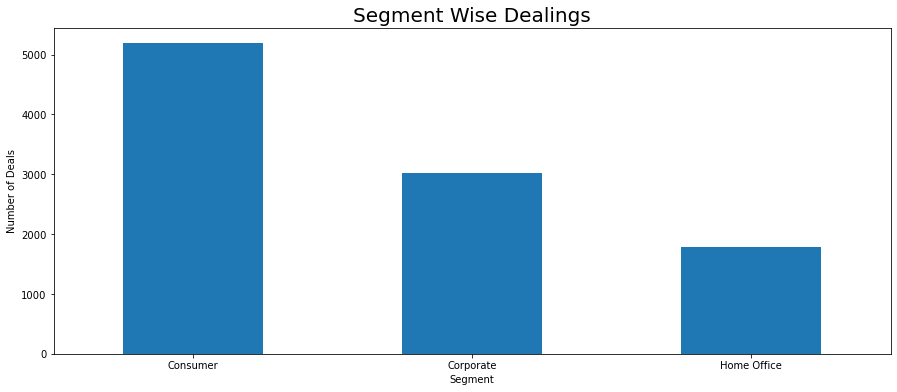

In [42]:
df['Segment'].value_counts().plot(kind='bar',figsize=(15,6))
plt.title('Segment Wise Dealings',fontsize=20)
plt.xlabel('Segment')
plt.ylabel('Number of Deals')
plt.xticks(rotation=0)
plt.show()

**Highest Number of Dealing**
* **Consumer**

**Lowest Number of Dealing**
* **Home Office**

In [43]:
df['Segment'].value_counts().mean()

3331.3333333333335

**Average Number of Per Deal: 3331**

Text(0.5, 1.0, 'Segment wise analysis of Sales, profit, Discount')

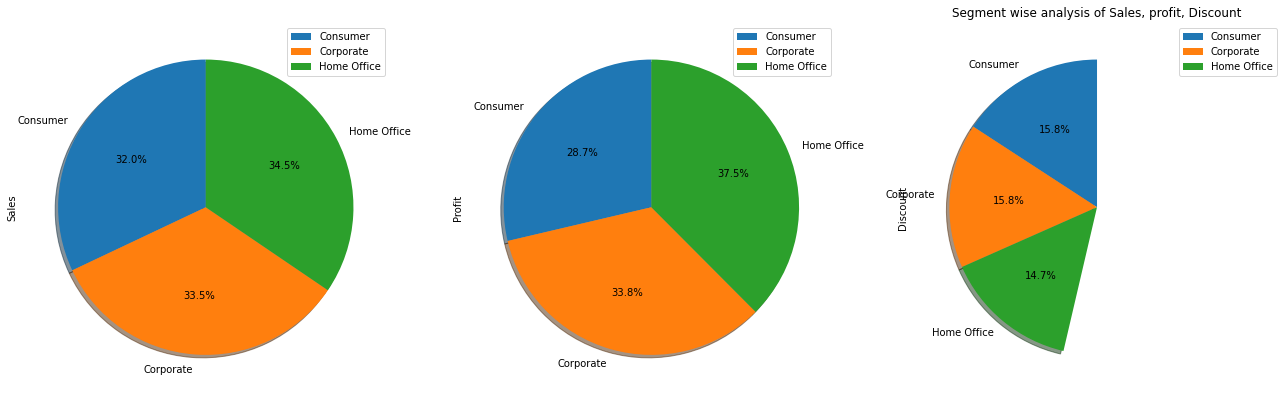

In [44]:
df_segment.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(18, 20), startangle=90, shadow=True, labels = df_segment.index)
plt.tight_layout()
plt.title('Segment wise analysis of Sales, profit, Discount')

**Segment Wise Sales:**
* **Home Office: 34.5%**
* **Corporate: 33.5%**
* **Cousumer: 32%**
    
**Segment Wise Profit:**
* **Home Office: 37.5%**
* **Corporate: 33.8%**
* **Cousumer: 28:7%**
        
**Segment Wise Discount:**
* **Home Office: 14.7%**
* **Corporate: 15.8%**
* **Cousumer: 15.8%**

### Region Wise Dealing Analysis

In [45]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [46]:
df_region= df.groupby(['Region'])[['Sales', 'Profit','Discount','Quantity']].mean()
df_region

,Sales,Profit,Discount,Quantity
Region,,,,
Central,215.772661,17.092709,0.240353,3.779595
East,238.336110,32.135808,0.145365,3.728230
South,241.803645,28.857673,0.147253,3.832716
West,226.493233,33.849032,0.109335,3.829535


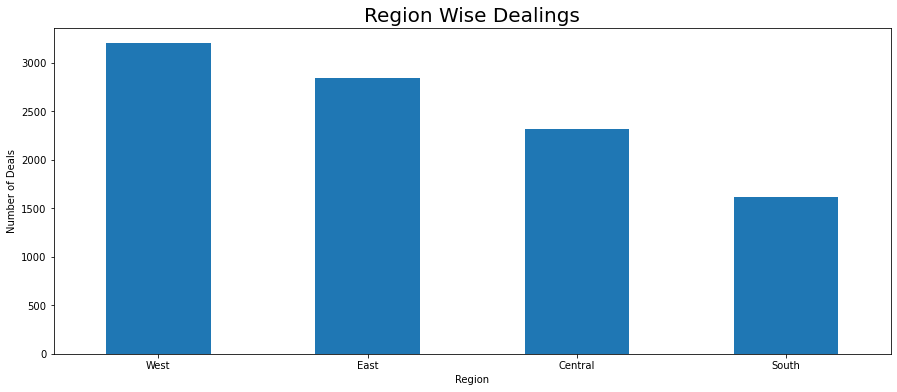

In [47]:
df['Region'].value_counts().plot(kind='bar',figsize=(15,6))
plt.title('Region Wise Dealings',fontsize=20)
plt.xlabel('Region')
plt.ylabel('Number of Deals')
plt.xticks(rotation=0)
plt.show()

**Highest Number of Deal**
* **West**

**Lowest Number of Deal**
* **South**

Text(0.5, 1.0, 'Region wise analysis of Sales, profit, Discount, Quantity')

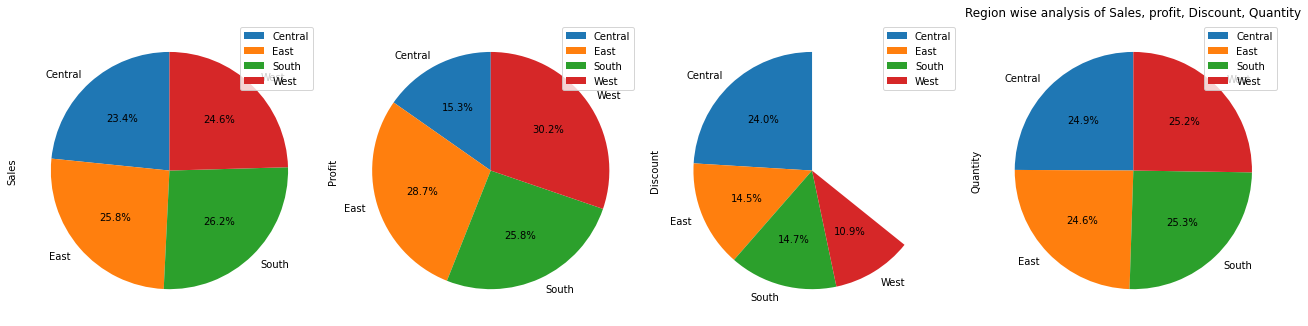

In [48]:
df_region.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(18, 20), startangle=90, labels = df_region.index)
plt.tight_layout()
plt.title('Region wise analysis of Sales, profit, Discount, Quantity')

**Region Wise Sales:**
* **South: 26.2%**
* **East: 25.8%**
* **West: 24.6%**
* **Central: 23.4%**
    
**Region Wise Profit:**
* **South: 25.8%**
* **East: 28.7%**
* **West: 30.2%**
* **Central: 15.3%**
    
**Region Wise Discount:**
* **South: 14.7%**
* **East: 14.5%**
* **West: 10.9%**
* **Central: 24%**
    
**Region Wise Quantity:**
* **South: 25.3%**
* **East: 24.6%**
* **West: 25.2%**
* **Central: 24.9%**

### Ship Mode Wise Dealing Analysis

In [49]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [50]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Profit', 'Discount', 'Quantity']].mean()
df_shipmode

,Sales,Profit,Discount,Quantity
Ship Mode,,,,
First Class,228.497024,31.839948,0.164610,3.701560
Same Day,236.396179,29.266591,0.152394,3.609576
Second Class,236.089239,29.535545,0.138895,3.816452
Standard Class,227.583067,27.494770,0.160023,3.819873


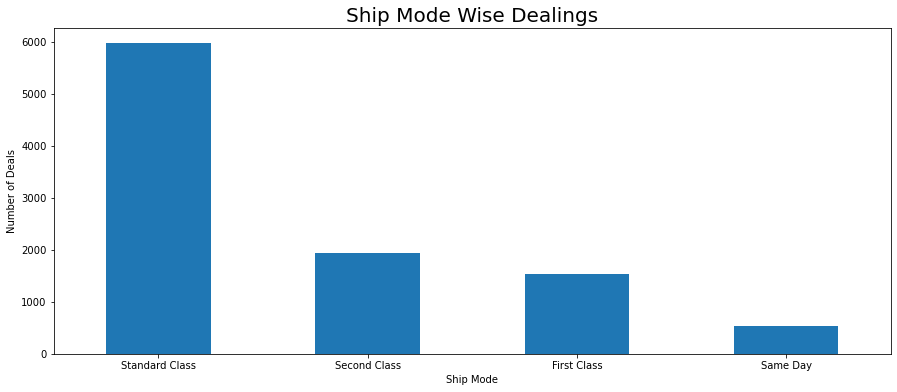

In [102]:
df['Ship Mode'].value_counts().plot(kind='bar',figsize=(15,6))
plt.title('Ship Mode Wise Dealings',fontsize=20)
plt.xlabel('Ship Mode')
plt.ylabel('Number of Deals')
plt.xticks(rotation=0)
plt.show()

**Highest Number of Deal**
* **Standard Class**

**Lowest Number of Deal**
* **Same Day**

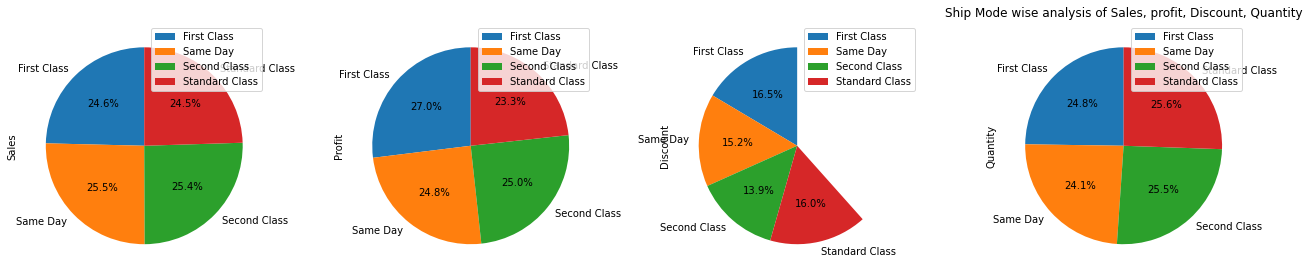

In [51]:
df_shipmode.plot(kind='pie',subplots=True,figsize=(18, 20), autopct='%1.1f%%', startangle=90, labels = df_shipmode.index)
plt.title('Ship Mode wise analysis of Sales, profit, Discount, Quantity')
plt.tight_layout()
plt.legend()

**Ship Mode Wise Sales:**
* **Same day: 25.5%**
* **Second Class: 25.4%**
* **First Class: 24.6%**
* **Standard Class: 24.5%**
    
**Ship Mode Wise Profit:**
* **Same day: 24.8%**
* **Second Class: 25%**
* **First Class: 27%**
* **Standard Class: 23.3%**
    
**Ship Mode Wise Discount:**
* **Same day: 15.2%**
* **Second Class: 13.9%**
* **First Class: 16.5%**
* **Standard Class: 16%**
    
**Ship Mode Wise Sales:**
* **Same day: 24.1%**
* **Second Class: 25.5%**
* **First Class: 24.8%**
* **Standard Class: 25.6%**

### Quantity Wise Dealing Analysis

In [52]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


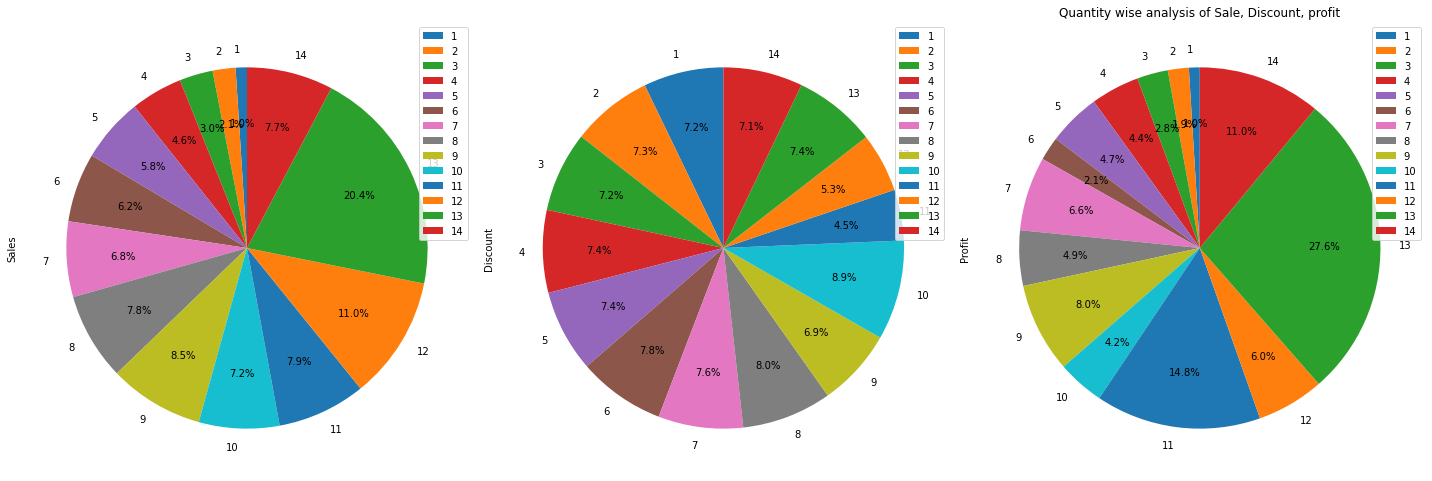

In [53]:
df_quantity.plot(kind='pie',subplots=True, autopct='%1.1f%%',figsize=(20, 20),pctdistance=0.69,startangle=90, labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit')
plt.tight_layout()

### Category Wise Dealing Analysis

In [103]:
df_category = df.groupby(['Category'])[['Sales', 'Profit', 'Discount']].mean()
df_category

,Sales,Profit,Discount
Category,,,
Furniture,349.834887,8.699327,0.173923
Office Supplies,119.324101,20.327050,0.157285
Technology,452.709276,78.752002,0.132323


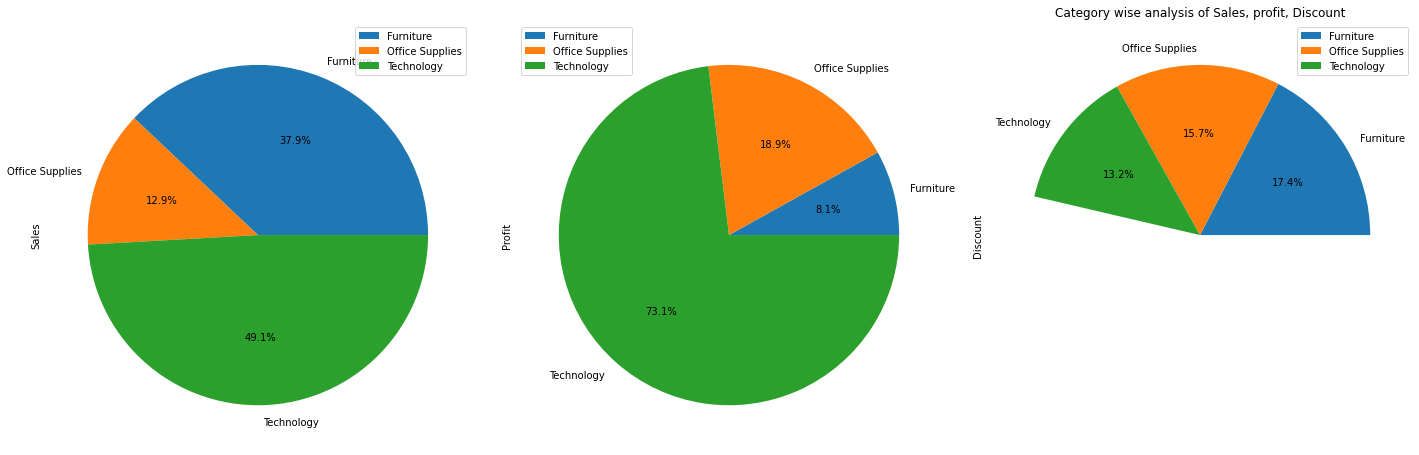

In [104]:
df_category.plot(kind='pie',subplots=True, figsize=(20, 20), autopct='%1.1f%%', labels = df_category.index)
plt.title('Category wise analysis of Sales, profit, Discount')
plt.tight_layout()

**Category Wise Sales:**
* **Technology: 49.1%**
* **Furniture: 37.9%**
* **Office Supplies: 12.9%**
    
**Category Wise Profit:**
* **Technology: 73.1%**
* **Furniture: 8.1%**
* **Office Supplies: 18.9%**
    
**Category Wise Discount:**
* **Technology: 13.2%**
* **Furniture: 17.4%**
* **Office Supplies: 15.7%**

### Sub-Category Wise Dealing Analysis

In [56]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [57]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Profit', 'Discount', 'Quantity']].mean()
df_sub_category.head(10)

,Sales,Profit,Discount,Quantity
Sub-Category,,,,
Accessories,215.974604,54.111788,0.078452,3.840000
Appliances,230.755710,38.922758,0.166524,3.710300
Art,34.068834,8.200737,0.074874,3.768844
Binders,133.560560,19.843574,0.372292,3.922521
Bookcases,503.859633,-15.230509,0.211140,3.807018
Chairs,532.332420,43.095894,0.170178,3.818476
Copiers,2198.941618,817.909190,0.161765,3.441176
Envelopes,64.867724,27.418019,0.080315,3.566929
Fasteners,13.936774,4.375660,0.082028,4.211982


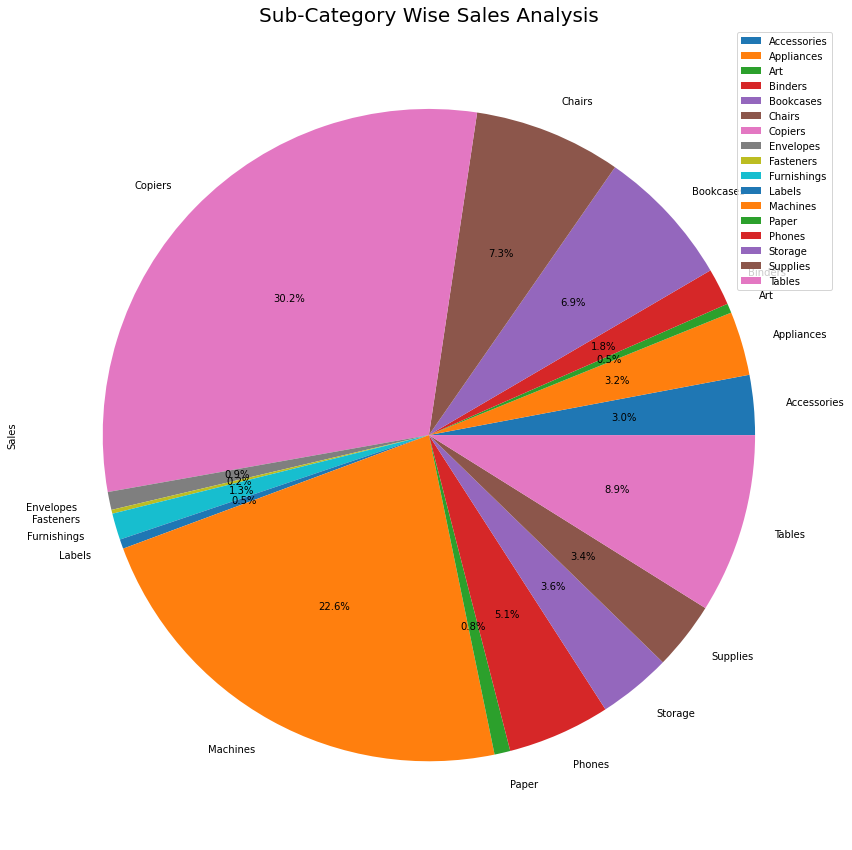

In [58]:
df_sub_category['Sales'].plot(kind='pie', figsize=(15,15), autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

**Sub-Category Wise Highest Sales**
* **Copiers**

**Sub-Category Wise Lowest Sales**
* **Fasteners**

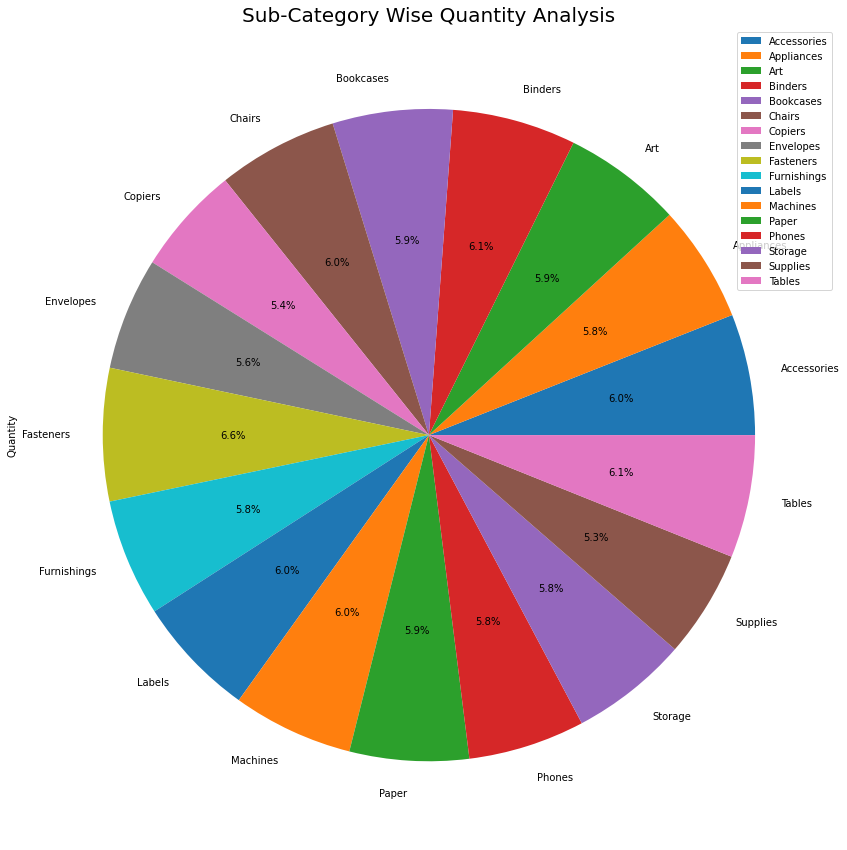

In [59]:
df_sub_category['Quantity'].plot(kind='pie', figsize=(15,15), autopct = '%1.1f%%')
plt.title('Sub-Category Wise Quantity Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

**Sub-Category Wise Highest Quantity**
* **Fasteners**

**Sub-Category Wise Lowest Quantity**
* **Supplies**

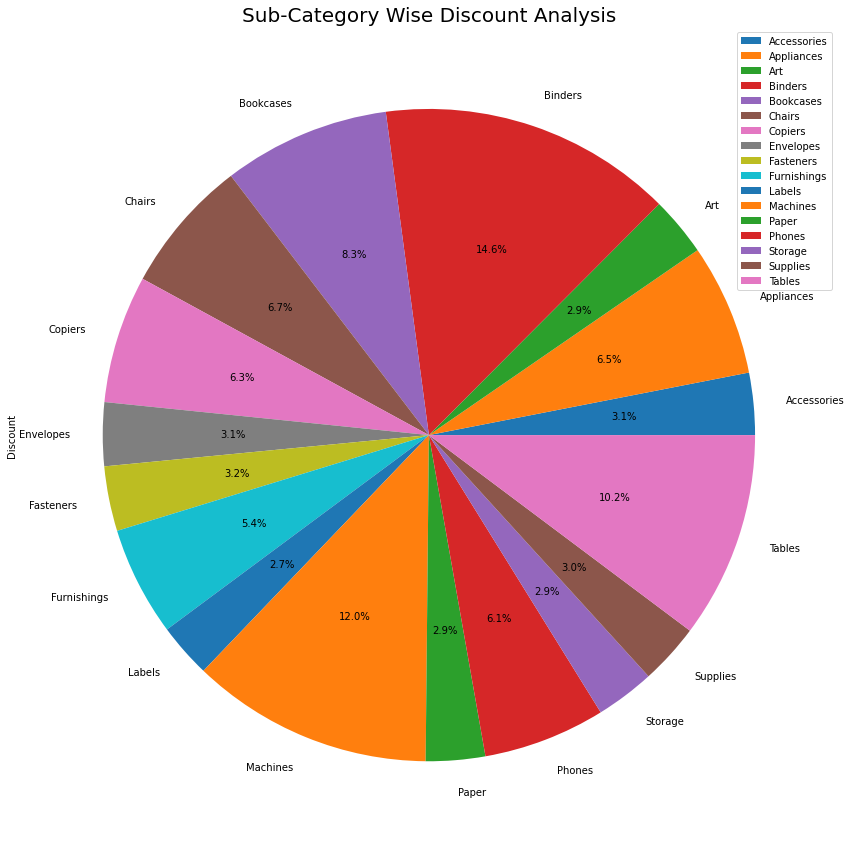

In [60]:
df_sub_category['Discount'].plot(kind='pie', figsize=(15,15), autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

**Sub-Category Wise Highest Discount**
* **Binders**

**Sub-Category Wise Lowest Discount**
* **Labels**

<AxesSubplot:xlabel='Sub-Category'>

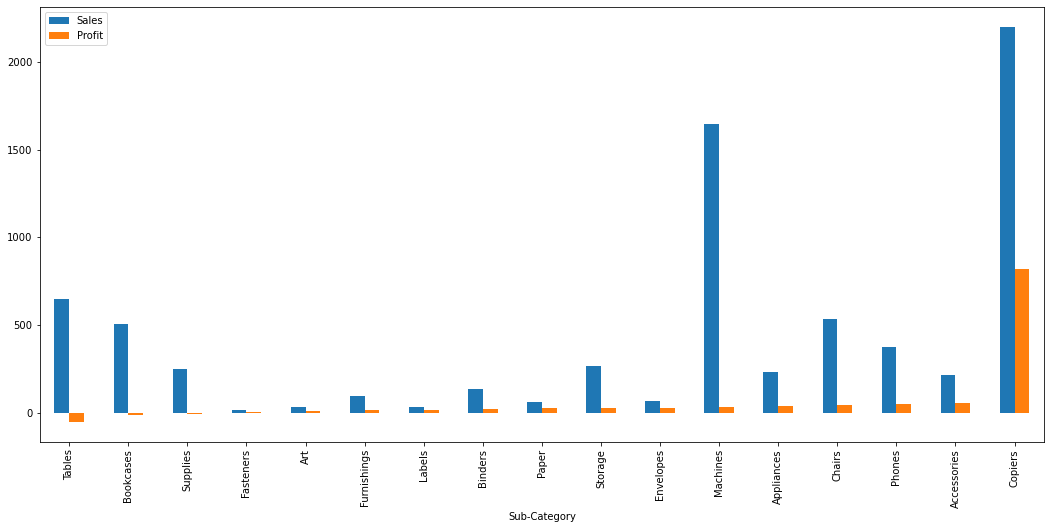

In [61]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',figsize= (18,8))

## **Thank You**